# Инфраструктура Python. CAS

Символьная (и точная) математика в Python делается через библиотеку `sympy` (входит в Anaconda). Она несколько уступает CAS с многолетней историей вроде Maple или Mathematica, зато тесно интегрирована с Python http://docs.sympy.org/latest/index.html

Попробовать `sympy` можно онлайн http://gamma.sympy.org/

In [1]:
import networkx, PIL
from io import BytesIO
import itertools
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy
from sympy import *
from sympy.solvers.diophantine import diophantine
from sympy.ntheory.factor_ import digits

from sympy.abc import h, k, n, t, x, y, z

In [3]:
sympy.__version__

'1.1.1'

## Символьные вычисления

Библиотека `sympy` предназначена для символьных вычислений. Она представляет математические выражения (переопределяя сотни имен `numpy`) в виде деревьев, над которыми может проводить различные операции, например, интегрирование.

In [4]:
expr = integrate(tanh(x), x)
expr

x - log(tanh(x) + 1)

In [5]:
print expr
print srepr(expr)

x - log(tanh(x) + 1)
Add(Symbol('x'), Mul(Integer(-1), log(Add(tanh(Symbol('x')), Integer(1)))))


In [6]:
sympy.printing.tree.print_tree(expr)

Add: x - log(tanh(x) + 1)
commutative: True
+-Symbol: x
| commutative: True
+-Mul: -log(tanh(x) + 1)
  commutative: True
  +-NegativeOne: -1
  | algebraic: True
  | commutative: True
  | complex: True
  | composite: False
  | even: False
  | finite: True
  | hermitian: True
  | imaginary: False
  | infinite: False
  | integer: True
  | irrational: False
  | negative: True
  | noninteger: False
  | nonnegative: False
  | nonpositive: True
  | nonzero: True
  | odd: True
  | positive: False
  | prime: False
  | rational: True
  | real: True
  | transcendental: False
  | zero: False
  +-log: log(tanh(x) + 1)
    commutative: True
    +-Add: tanh(x) + 1
      commutative: True
      +-One: 1
      | algebraic: True
      | commutative: True
      | complex: True
      | even: False
      | finite: True
      | hermitian: True
      | imaginary: False
      | infinite: False
      | integer: True
      | irrational: False
      | negative: False
      | noninteger: False
      | nonnegative

x - log(tanh(x) + 1)

Mul(NegativeOne(), log(Add(One(), tanh(Symbol(x)))))_(1,)
Symbol(x)_(1, 1, 0, 1, 0)
NegativeOne()_(1, 0)
Add(Symbol(x), Mul(NegativeOne(), log(Add(One(), tanh(Symbol(x))))))_()
log(Add(One(), tanh(Symbol(x))))_(1, 1)
tanh(Symbol(x))_(1, 1, 0, 1)
Symbol(x)_(0,)
One()_(1, 1, 0, 0)
Add(One(), tanh(Symbol(x)))_(1, 1, 0)


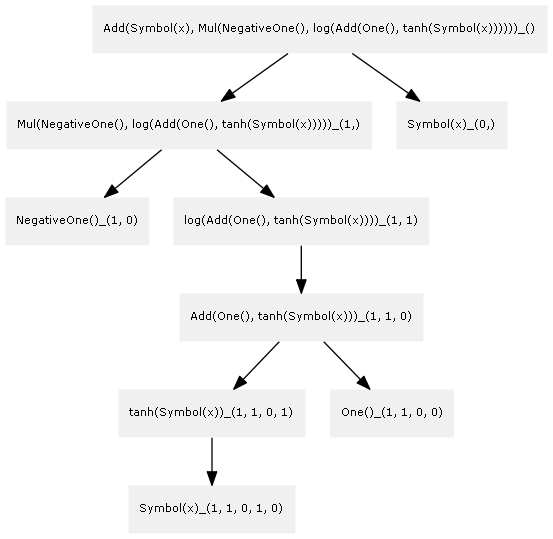

In [7]:
import sympy.printing.dot
dotstr = sympy.printing.dot.dotprint(expr)
graph = networkx.nx_pydot.read_dot(BytesIO(dotstr))

print expr
print
print '\r\n'.join(list(graph.nodes))

A = networkx.nx_agraph.to_agraph(graph)
for node in A.nodes():
    if not node.attr['fontname']:
        node.attr['fontsize'] = 8
        node.attr['fontname'] = 'Verdana'
        node.attr['shape'] = 'none'
        node.attr['style'] = 'filled'
        node.attr['color'] = '#F0F0F0'

io = BytesIO()
A.draw(io, format='png', prog='dot')
PIL.Image.open(io)

Ввести собственные символы (или распарсить выражение) можно, используя `Symbol`, `var` (`symbols`), `S` (`sympify`).

In [8]:
Symbol('x') ** 2

x**2

In [9]:
sum(var('a b c'))

a + b + c

In [10]:
x1, x2 = symbols('x_1 x_2')
solve(x1 ** 2 + x2 ** 2 - 1)

[{x_1: -sqrt(-x_2**2 + 1)}, {x_1: sqrt(-x_2**2 + 1)}]

In [11]:
[S('1/2') ** i for i in range(5)]

[1, 1/2, 1/4, 1/8, 1/16]

In [12]:
solve(S('x1 ** 2 + x2 ** 2 - 1'))

[{x1: -sqrt(-x2**2 + 1)}, {x1: sqrt(-x2**2 + 1)}]

## Отображение выражений

Выражения `sympy` можно просматривать в различных формах, конвертировать в код на разных языках программирования, впрочем, не всегда успешно.

In [13]:
alpha, beta, x = var('alpha beta x')
expr = (sin(alpha)**2 + 2*cos(beta)) / x
print latex(expr)
print ccode(expr)
print jscode(expr)
print mathematica_code(expr)

\frac{1}{x} \left(\sin^{2}{\left (\alpha \right )} + 2 \cos{\left (\beta \right )}\right)
(pow(sin(alpha), 2) + 2*cos(beta))/x
(Math.pow(Math.sin(alpha), 2) + 2*Math.cos(beta))/x
(Sin[alpha]^2 + 2*Cos[beta])/x


In [14]:
print latex(divisor_sigma(n))
print
print ccode(divisor_sigma(n))
print
print jscode(divisor_sigma(n), n)
print
print mathematica_code(divisor_sigma(n)) # должно быть DivisorSigma[1,n]

\sigma\left(n\right)

// Not supported in C:
// divisor_sigma
divisor_sigma(n)

// Not supported in Javascript:
// divisor_sigma
n = divisor_sigma(n);

divisor_sigma[n]


In [15]:
print expr

(sin(alpha)**2 + 2*cos(beta))/x


In [16]:
pprint(expr)

   2              
sin (α) + 2⋅cos(β)
──────────────────
        x         


In [17]:
import IPython
display(IPython.display.Latex('$%s$' % latex(expr)))

<IPython.core.display.Latex object>

Оставить один из этих форматов вывода в качестве дефолтного в IPython можно одним из трех вызовов

In [18]:
init_printing(use_latex=False, pretty_print=False)
expr

(sin(alpha)**2 + 2*cos(beta))/x

In [19]:
init_printing(use_latex=False, pretty_print=True)
expr

   2              
sin (α) + 2⋅cos(β)
──────────────────
        x         

In [20]:
init_printing(use_latex='mathjax')
display(expr)
display([1, 2, 3])

   2              
sin (α) + 2⋅cos(β)
──────────────────
        x         

[1, 2, 3]

Просматривать встроенные типы в виде $\LaTeX$ может быть неудобно, так что стоит использовать

In [21]:
init_printing(use_latex='mathjax', print_builtin=False)
display(expr)
display([1, 2, 3])

   2              
sin (α) + 2⋅cos(β)
──────────────────
        x         

[1, 2, 3]

## Стандартные операции над выражениями

In [22]:
print N(pi, 100)
print pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


In [23]:
print type(N(pi))
print type(float(pi))

<class 'sympy.core.numbers.Float'>
<type 'float'>


In [24]:
print N(I ** I)

0.207879576350762


In [25]:
simplify((x**2 - 4)/((x+3)*(x-2)))

x + 2
─────
x + 3

In [26]:
div(x**2 - 4 + x, x-2)

(x + 3, 2)

In [27]:
factor(x**4/2 + 5*x**3/12 - x**2/3)

 2                    
x ⋅(2⋅x - 1)⋅(3⋅x + 4)
──────────────────────
          12          

In [28]:
apart(x/((x+2)*(x+1)), x)

  2       1  
───── - ─────
x + 2   x + 1

In [29]:
together(1/(x+2) + 1/(x+1))

    2⋅x + 3    
───────────────
(x + 1)⋅(x + 2)

In [30]:
S('(a+sqrt(b))**5').expand()

 5      4          3         2  3/2        2    5/2
a  + 5⋅a ⋅√b + 10⋅a ⋅b + 10⋅a ⋅b    + 5⋅a⋅b  + b   

In [31]:
expand((x+y)**5)

 5      4         3  2       2  3        4    5
x  + 5⋅x ⋅y + 10⋅x ⋅y  + 10⋅x ⋅y  + 5⋅x⋅y  + y 

In [32]:
expand_trig(sin(3*x))

       3              
- 4⋅sin (x) + 3⋅sin(x)

In [33]:
sin(3*x).rewrite(tan)

       ⎛3⋅x⎞ 
  2⋅tan⎜───⎟ 
       ⎝ 2 ⎠ 
─────────────
   2⎛3⋅x⎞    
tan ⎜───⎟ + 1
    ⎝ 2 ⎠    

In [34]:
((x+y)**5).subs(y, 2)

       5
(x + 2) 

In [35]:
((x+y)**5).subs([(x, 1), (y, sqrt(y))]).expand()

 5/2       3/2             2           
y    + 10⋅y    + 5⋅√y + 5⋅y  + 10⋅y + 1

In [36]:
p = expand(Poly('x + y') ** 10)
print p.coeffs()
print p.monoms()

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[(10, 0), (9, 1), (8, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (2, 8), (1, 9), (0, 10)]


Выражение можно превратить в функцию

In [37]:
f = Lambda(x, x ** 2)
print f(5)
print integrate(f(t), t)

25
t**3/3


## solve

Функция `solve` это причина, по которой CAS вообще нужны

In [38]:
print solve(x ** 2 - 5 * x + 6)

[2, 3]


In [39]:
solve(x ** 2 - 5 * x + 6 > 0)

(-∞ < x ∧ x < 2) ∨ (3 < x ∧ x < ∞)

In [40]:
map(display, solve(x**3 + 4*x + 181, x));

                                                        ___________________
                                       ⎛  1   √3⋅ⅈ⎞    ╱ 4887   3⋅√2654409 
                                       ⎜- ─ - ────⎟⋅3 ╱  ──── + ────────── 
                 4                     ⎝  2    2  ⎠ ╲╱    2         2      
──────────────────────────────────── - ────────────────────────────────────
                 ___________________                    3                  
⎛  1   √3⋅ⅈ⎞    ╱ 4887   3⋅√2654409                                        
⎜- ─ - ────⎟⋅3 ╱  ──── + ──────────                                        
⎝  2    2  ⎠ ╲╱    2         2                                             

                   ___________________                                       
  ⎛  1   √3⋅ⅈ⎞    ╱ 4887   3⋅√2654409                                        
  ⎜- ─ + ────⎟⋅3 ╱  ──── + ──────────                                        
  ⎝  2    2  ⎠ ╲╱    2         2                          4                  
- ──────────────────────────────────── + ────────────────────────────────────
                   3                                      ___________________
                                         ⎛  1   √3⋅ⅈ⎞    ╱ 4887   3⋅√2654409 
                                         ⎜- ─ + ────⎟⋅3 ╱  ──── + ────────── 
                                         ⎝  2    2  ⎠ ╲╱    2         2      

      ___________________                          
     ╱ 4887   3⋅√2654409                           
  3 ╱  ──── + ──────────                           
  ╲╱    2         2                    4           
- ─────────────────────── + ───────────────────────
             3                  ___________________
                               ╱ 4887   3⋅√2654409 
                            3 ╱  ──── + ────────── 
                            ╲╱    2         2      

In [41]:
solve(sin(x) - S('1/sqrt(2)'))

⎡π  3⋅π⎤
⎢─, ───⎥
⎣4   4 ⎦

In [42]:
solveset(sin(x) - S('1/sqrt(2)'))

⎧        3⋅π        ⎫   ⎧        π        ⎫
⎨2⋅n⋅π + ─── | n ∊ ℤ⎬ ∪ ⎨2⋅n⋅π + ─ | n ∊ ℤ⎬
⎩         4         ⎭   ⎩        4        ⎭

In [43]:
solve(exp(x) + x - 2)[0]

          ⎛ 2⎞    
- LambertW⎝ℯ ⎠ + 2

In [44]:
solve([x + y - 5, y - x - 6], (x,y))

{x: -1/2, y: 11/2}

Увы, пока что `sympy` не умеет решать системы неравенств, в отличие от Sage.

In [45]:
solve([x + y > 5, y - x < 6], (x,y))

NotImplementedError: 
inequality has more than one symbol of interest

## Матан

Предел

In [46]:
limit(sin(x) / x, x, 0)

1

In [47]:
limit((cos(x) - 1) / x ** 2, x, 0)

-1/2

Дифференцирование

In [48]:
expr = sin(x)**2 + 2*cos(x)

In [49]:
expr.diff(x)

2⋅sin(x)⋅cos(x) - 2⋅sin(x)

In [50]:
diff(sin(x) / x)

cos(x)   sin(x)
────── - ──────
  x         2  
           x   

In [51]:
diff(x / (x**2 + 2*x + 1), x)

  x⋅(-2⋅x - 2)         1      
─────────────── + ────────────
              2    2          
⎛ 2          ⎞    x  + 2⋅x + 1
⎝x  + 2⋅x + 1⎠                

In [52]:
[diff(sin(2 * x), x, u) for u in range(5)]

[sin(2⋅x), 2⋅cos(2⋅x), -4⋅sin(2⋅x), -8⋅cos(2⋅x), 16⋅sin(2⋅x)]

Интегрирование

In [53]:
expr.integrate(x)

x   sin(x)⋅cos(x)           
─ - ───────────── + 2⋅sin(x)
2         2                 

In [54]:
integrate(x / (x**2 + 2*x + 1), x)

               1  
log(x + 1) + ─────
             x + 1

In [55]:
integrate(sin(x)/x, x)

Si(x)

In [56]:
sigma = var('sigma')
integrate(exp(-x**2 / 2 / sigma ** 2) / sqrt(2 * pi) / sigma, x)

   ⎛          ____⎞
   ⎜         ╱ 1  ⎟
   ⎜√2⋅x⋅   ╱  ── ⎟
   ⎜       ╱    2 ⎟
   ⎜     ╲╱    σ  ⎟
erf⎜──────────────⎟
   ⎝      2       ⎠
───────────────────
            ____   
           ╱ 1     
   2⋅σ⋅   ╱  ──    
         ╱    2    
       ╲╱    σ     

In [57]:
integrate(sin(x)/x, (x, -oo, oo))

π

Ряд Тейлора

In [58]:
series(tan(x), x, 0, 15)

     3      5       7       9         11          13         
    x    2⋅x    17⋅x    62⋅x    1382⋅x     21844⋅x      ⎛ 15⎞
x + ── + ──── + ───── + ───── + ──────── + ───────── + O⎝x  ⎠
    3     15     315     2835    155925     6081075          

Ряды Фурье

In [59]:
ser = fourier_series(x**2, (x, -pi, pi))
ser

                        2    
                       π     
-4⋅cos(x) + cos(2⋅x) + ── + …
                       3     

In [60]:
fourier_transform(exp(-x ** 2), x, k)

      2  2
    -π ⋅k 
√π⋅ℯ      

In [61]:
inverse_fourier_transform(sqrt(pi)*exp(-(pi*k)**2), k, x)

   2
 -x 
ℯ   

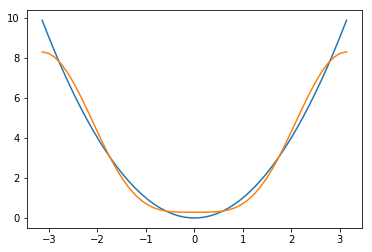

In [62]:
serfn = lambdify(x, ser.truncate(3))

xx = linspace(-numpy.pi, numpy.pi)
matplotlib.pyplot.plot(xx, xx ** 2);
matplotlib.pyplot.plot(xx, serfn(xx));

Векторные поля

In [63]:
from sympy.vector import CoordSys3D, express, divergence, curl, gradient, scalar_potential

In [64]:
R = CoordSys3D('R')
vector_field = R.x * R.y * R.i + R.y ** 2 * R.j + R.z ** 2 * R.k
display(divergence(vector_field))
display(curl(vector_field))

3⋅R_y + 2⋅R_z

(-R_x) R_k

In [65]:
scalar_field = R.x * R.y + R.y ** 2 + R.z ** 2
gr = gradient(scalar_field)
gr

(R_y) R_i + (R_x + 2⋅R_y) R_j + (2⋅R_z) R_k

In [66]:
print sympy.vector.is_conservative(gr)
print sympy.vector.is_solenoidal(gr)

True
False


In [67]:
scalar_potential(R.y * R.i + (R.x + 2 * R.y) * R.j + R.z * R.k, R)

                    2
             2   R_z 
R_x⋅R_y + R_y  + ────
                  2  

Дифференциальные уравнения

In [68]:
dsolve(y(t).diff(t, t) - y(t) - exp(t), y(t))

           -t   ⎛     t⎞  t
y(t) = C₂⋅ℯ   + ⎜C₁ + ─⎟⋅ℯ 
                ⎝     2⎠   

In [69]:
dsolve((Eq(x(t).diff(t), 2 * x(t) + 3 * y(t)), Eq(y(t).diff(t), 1 * x(t) + 4 * y(t))))

⎡             t         5⋅t               t         5⋅t⎤
⎣x(t) = 3⋅C₁⋅ℯ  + 3⋅C₂⋅ℯ   , y(t) = - C₁⋅ℯ  + 3⋅C₂⋅ℯ   ⎦

Урчпы

In [70]:
f = Function('f')
u = f(x, y)
u_x = u.diff(x)
u_y = u.diff(y)
pdsolve(Eq(1 + (2*(u_x/u)) + (3*(u_y/u))))

                          2⋅x   3⋅y
                        - ─── - ───
                           13    13
f(x, y) = F(3⋅x - 2⋅y)⋅ℯ           

## Линал

Для вещественных чисел в `sympy` определены функции `sign Min Max`, для комплексных `re im arg conjugate Abs`.

Матрицы, транспонирование, арифметика, определитель, след, обратная, характеристический полином, собственные значения, жорданова форма, канонический базис

In [71]:
Matrix(4,4, lambda i,j: (i+1)*(j+1))

⎡1  2  3   4 ⎤
⎢            ⎥
⎢2  4  6   8 ⎥
⎢            ⎥
⎢3  6  9   12⎥
⎢            ⎥
⎣4  8  12  16⎦

In [72]:
M = Matrix([[1,2],[3,4]])
display(M.T)
display(M * M)
display(M.multiply_elementwise(M))

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

⎡7   10⎤
⎢      ⎥
⎣15  22⎦

⎡1  4 ⎤
⎢     ⎥
⎣9  16⎦

In [73]:
m = Matrix([[S('1/2'), S('1/2'), S('0')], [S('1/2'), S('0'), S('1/2')], [S('0'), S('1/2'), S('1/2')]])
m

⎡1/2  1/2   0 ⎤
⎢             ⎥
⎢1/2   0   1/2⎥
⎢             ⎥
⎣ 0   1/2  1/2⎦

In [74]:
det(m), trace(m)

(-1/4, 1)

In [75]:
m.inv()

⎡1   1   -1⎤
⎢          ⎥
⎢1   -1  1 ⎥
⎢          ⎥
⎣-1  1   1 ⎦

In [76]:
FiboM = Matrix([[1,1],[1,0]])
FiboM

⎡1  1⎤
⎢    ⎥
⎣1  0⎦

In [77]:
FiboM ** (-1)

⎡0  1 ⎤
⎢     ⎥
⎣1  -1⎦

In [78]:
FiboM ** 8

⎡34  21⎤
⎢      ⎥
⎣21  13⎦

In [79]:
print FiboM.det(), FiboM.trace()

-1 1


In [80]:
FiboM.charpoly(var('lamda'))

PurePoly(lamda**2 - lamda - 1, lamda, domain='ZZ')

In [81]:
FiboM.eigenvals()

{-sqrt(5)/2 + 1/2: 1, 1/2 + sqrt(5)/2: 1}

In [82]:
FiboM.eigenvects()

[(1/2 + sqrt(5)/2, 1, [Matrix([
   [-1/(-sqrt(5)/2 + 1/2)],
   [                    1]])]), (-sqrt(5)/2 + 1/2, 1, [Matrix([
   [-1/(1/2 + sqrt(5)/2)],
   [                   1]])])]

In [83]:
kb, jf = simplify(FiboM.jordan_form())
display(jf)
display(kb)

⎡1   √5          ⎤
⎢─ + ──     0    ⎥
⎢2   2           ⎥
⎢                ⎥
⎢          √5   1⎥
⎢  0     - ── + ─⎥
⎣          2    2⎦

⎡1   √5    √5   1⎤
⎢─ + ──  - ── + ─⎥
⎢2   2     2    2⎥
⎢                ⎥
⎣  1        1    ⎦

In [84]:
simplify(kb * jf * kb.inv())

⎡1  1⎤
⎢    ⎥
⎣1  0⎦

In [85]:
simplify(kb * (jf ** k) * kb.inv())[1,0]

 -k    ⎛        k            k⎞
2  ⋅√5⋅⎝(1 + √5)  - (-√5 + 1) ⎠
───────────────────────────────
               5               

In [86]:
x1, y1, z1, x2, y2, z2 = var('x1 y1 z1 x2 y2 z2')
cross([x1,y1,z1], [x2,y2,z2])

array([y1*z2 - y2*z1, -x1*z2 + x2*z1, x1*y2 - x2*y1], dtype=object)

In [87]:
Matrix(symarray('a', (3,))).norm()

   _______________________
  ╱     2       2       2 
╲╱  │a₀│  + │a₁│  + │a₂│  

In [88]:
Matrix([x1,y1,z1]).norm()

   _______________________
  ╱     2       2       2 
╲╱  │x₁│  + │y₁│  + │z₁│  

In [89]:
X = MatrixSymbol('X', 3, 3)
Y = MatrixSymbol('Y', 3, 3)
(X * Y)[1, 2]

X₁₀⋅Y₀₂ + X₁₁⋅Y₁₂ + X₁₂⋅Y₂₂

## Конкретная математика

Суммирование

In [90]:
summation(k ** 2, (k, 1, n))

 3    2    
n    n    n
── + ── + ─
3    2    6

In [91]:
summation(x ** k, (k, 0, oo))

⎧   1                 
⎪ ──────   for │x│ < 1
⎪ -x + 1              
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    k             
⎪  ╱   x    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪k = 0                
⎩                     

Не все суммы поддаются движку sympy

In [92]:
A, B = var('A B', positive=True, integer=True)
summation(Abs(x - y), (x, 1, A), (y, 1, B))

  B     A          
 ___   ___         
 ╲     ╲           
  ╲     ╲   │x - y│
  ╱     ╱          
 ╱     ╱           
 ‾‾‾   ‾‾‾         
y = 1 x = 1        

Решение рекуррентности (вывод формулы Бине)

In [93]:
rsolve(y(n+2)-y(n+1)-y(n), y(n), {y(0): 0, y(1): 1})

           n                n
   ⎛1   √5⎞       ⎛  √5   1⎞ 
√5⋅⎜─ + ──⎟    √5⋅⎜- ── + ─⎟ 
   ⎝2   2 ⎠       ⎝  2    2⎠ 
──────────── - ──────────────
     5               5       

Цепная дробь

In [94]:
list(continued_fraction_iterator(Rational(3, 8)))

[0, 2, 1, 2]

$$\frac{3}{8} = 0 + \frac{1}{2 + \frac{1}{1 + \frac{1}{2}}}$$

In [95]:
list(itertools.islice(continued_fraction_convergents(continued_fraction_iterator(pi)), 0, 10))

⎡         333  355  103993  104348  208341  312689  833719  1146408⎤
⎢3, 22/7, ───, ───, ──────, ──────, ──────, ──────, ──────, ───────⎥
⎣         106  113  33102   33215   66317   99532   265381   364913⎦

In [96]:
p, q, r = var('p q r')
k2 = to_dnf((p >> q) & r)
print k2
print list(satisfiable(k2, all_models=True))

(q & r) | (r & ~p)
[{p: False, r: True, q: True}, {p: False, r: True, q: False}, {p: True, r: True, q: True}]


## Теория чисел

In [97]:
digits(13, 2)

[2, 1, 1, 0, 1]

In [98]:
print primepi(1000)
print list(primerange(1, 1000))

168
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [99]:
print prime(100)
print isprime(2 ** 127 - 1)
print nextprime(1000000000)

541
True
1000000007


In [100]:
print factorint(84759364534527)

{2048953: 1, 3: 3, 1532117: 1}


In [101]:
%%time
factorint(2 ** 67 - 1)

Wall time: 298 ms


{193707721: 1, 761838257287L: 1}

Профессор Коул к 1903 году потратил на это «все воскресенья в течение трех лет».

In [102]:
print gcd(244, 68), gcdex(244, 68), -5 * 244 + 18 * 68

4 (-5, 18, 4) 4


In [103]:
print sum(divisors(284)[:-1]), sum(divisors(220)[:-1])

220 284


In [104]:
print divisor_count(12), divisor_sigma(12)
print divisors(12)
print totient(12)

6 28
[1, 2, 3, 4, 6, 12]
4


Китайская теорема

In [105]:
from sympy.ntheory.modular import crt
print crt([99, 97, 95], [49, 76, 65])
print 639985 % 99, 639985 % 97, 639985 % 95, 99 * 97 * 95

(639985, 912285)
49 76 65 912285


Проверка обращения Мёбиуса $G(n) = \sum_{d|n} F(d) \Leftrightarrow F(n) = \sum_{d|n} \mu(d) G(\frac{n}{d})$

In [106]:
j_divides_i = Matrix(fromfunction(lambda i,j: where((i+1) % (j+1) == 0, 1, 0), (20, 20)))
inv_j_divides_i = j_divides_i.inv()
inv_j_divides_i

⎡1   0   0   0   0   0   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎤
⎢                                                                    ⎥
⎢-1  1   0   0   0   0   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢-1  0   1   0   0   0   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢0   -1  0   1   0   0   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢-1  0   0   0   1   0   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢1   -1  -1  0   0   1   0   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢-1  0   0   0   0   0   1   0   0   0   0  0  0  0  0  0  0  0  0  0⎥
⎢                                                                    ⎥
⎢0   0

In [107]:
mo = [[int(mobius((i + 1) / (j + 1))) if (i + 1) % (j + 1) == 0 else 0 for j in range(20)] for i in range(20)]
Matrix(mo) == inv_j_divides_i

True

In [108]:
diophantine(2*x + 3*y - 5)

set([(3⋅t₀ - 5, -2⋅t₀ + 5)])

In [109]:
diophantine(x**2 - 4*x*y + 8*y**2 - 3*x + 7*y - 5)

{(2, 1), (5, 1)}

In [110]:
%%time
a = 30741415699351712223222592216948664852787225938672761888182663459401433940293299920472821794247792558438137266179003170954852009167996
b = 5493768938913164268735898548345740984062864198582915532893452862692397723477349340213609803716310002722689784104429402408034399680657214203589114662020419403506380275921075865806868813167390548527002018378296772011002830464813992537445273710373363121247809539380530302504021135339366740636410963119289644130568327436166142653219502858785723203265988729334812946807271940413511096470449043813939925759131485224930805050595388961884769573807597931344321170355620526497042548348665782820474459300583235597864519400688289208986957832681459966933968204573143630154199268824952951642924625108969237666308633980889261559554117298872683137210357137988177192697560524562835477922442010038014370796719316949327823897102946508453004777622812045656957796013010907193455701053005247975317200627083352360327185314875288693488759973999715297338413318230762734322668133288476183336301663326505090120348966948964517423252467946014780068274519231694498484297
print max(list(diophantine(x**2 + a*(y**2) - b)))

(7348655773126303755629132256340558924373328617090197171706667985290133761074361570679971146341442904888591341841287254965947859225905297999477796015919477067007270662755471894303543848700521290783297130156224163076157960251257693490144231567905196959807936667239827765383424517553637410148296202159548497638625891934215562498854803999087988746111891278525153998140276439504335166247691283287982071011L, 13368210114309858110490408377394654362940185298164216827948999032605862717288140668701831983256694918479543797066513434530829632365715334435258980969002310473634736670934466710096296555376044613951842365465867556366705263409477296458008936007006429171666426262499427073084651776609218709214727849066557411083083942753965341146350258607478649802267967135142551807477661688074367083808666023441349174043384L)
Wall time: 20.1 s


## Перестановки

In [111]:
from sympy.combinatorics import Permutation

In [112]:
p = Permutation([0, 3, 2, 1])
q = Permutation([1, 2, 3, 0])
print p, q

(1 3) (0 1 2 3)


In [113]:
print Permutation([0,1,2,4,3]).rank()
print Permutation.unrank_lex(5, 3).array_form

1
[0, 1, 3, 4, 2]


In [114]:
print p.cycles, p.cycle_structure, q.cycle_structure

3 {1: 2, 2: 1} {4: 1}


In [115]:
print p.inversions(), p.is_even, p.parity()

3 False 1


In [116]:
print p.support(), q.support()

[1, 3] [0, 1, 2, 3]


In [117]:
print p.order(), q.order()

2 4


In [118]:
list(Permutation.from_sequence('eafbcd'))

[4, 0, 5, 1, 2, 3]

In [119]:
print p.rank(), p.next_lex().array_form

5 [1, 0, 2, 3]


In [120]:
print list(p * q), list(q * p)

[1, 0, 3, 2] [3, 2, 1, 0]


In [121]:
q.transpositions()

[(0, 3), (0, 2), (0, 1)]

In [122]:
pp = Permutation(0, 2)(1, 3)
print pp(range(4)), pp.list(), pp.cyclic_form, pp.array_form

[2, 3, 0, 1] [2, 3, 0, 1] [[0, 2], [1, 3]] [2, 3, 0, 1]


In [123]:
Permutation([[1,2]], size=5).list()

[0, 2, 1, 3, 4]

In [124]:
print Permutation([[1,2]], size=5).cyclic_form, Permutation([[1,2]], size=5).full_cyclic_form

[[1, 2]] [[0], [1, 2], [3], [4]]


In [125]:
Permutation(0, 4) == Permutation([4, 1, 2, 3, 0])

True

In [126]:
p.length()

2

In [127]:
[i ^ p ** 3 for i in range(4)]

[0, 3, 2, 1]

In [128]:
q(p(range(4))), (p * q)(range(4))

([3, 2, 1, 0], [1, 0, 3, 2])

## Группы

In [129]:
print list(sympy.combinatorics.dihedral(5))

[Permutation(4), Permutation(0, 4)(1, 3), Permutation(0, 1, 2, 3, 4), Permutation(1, 4)(2, 3), Permutation(0, 2, 4, 1, 3), Permutation(0, 1)(2, 4), Permutation(0, 3, 1, 4, 2), Permutation(0, 2)(3, 4), Permutation(0, 4, 3, 2, 1), Permutation(4)(0, 3)(1, 2)]


In [130]:
for gr in 'symmetric cyclic alternating dihedral'.split():
    print gr, len(list(getattr(sympy.combinatorics, gr)(5)))

symmetric 120
cyclic 5
alternating 60
dihedral 10


Мультипликативная группа, порядок элемента в $Z_n^*$, степень по модулю, корень по вычету, дискретный логарифм

In [131]:
pow(2, 100, 1000)

376

$2^{504} \equiv 1 \pmod{1009} \\
2^{503} \equiv 2^{-1} \equiv 505 \pmod{1009}$

In [132]:
print pow(2, 504, 1009), n_order(2, 1009), mod_inverse(2, 1009), pow(2, 504-1, 1009)

1 504 505 505


In [133]:
print nthroot_mod(505, 503, 1009), discrete_log(1009, 2, 505)

2 503


## Комбинаторика

In [134]:
print [fibonacci(k) for k in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [135]:
print factorial(100)
print subfactorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
34332795984163804765195977526776142032365783805375784983543400282685180793327632432791396429850988990237345920155783984828001486412574060553756854137069878601


In [136]:
print [binomial(10, k) for k in range(11)]

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]


Число Каталана — число правильных скобочных последовательностей длины $2n$

In [137]:
print [catalan(k) for k in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


Числа Стирлинга 1-го рода $\left[ n \atop k \right]$ — коэффициенты при $x^k$ разложения $x^{\underline{n}} = x (x-1) \ldots (x-n+1)$.

Числа Стирлинга 2-го рода  $\left\{ {n \atop k} \right\}$ — коэффициенты при $x^{\underline{k}}$ разложения $x^n$. Заодно число разбиений множества размера $n$ на $k$ непустых подмножеств.

In [138]:
k = var('k')
expand(product(x-k, (k, 0, 9)))

 10       9        8         7          6           5           4            3
x   - 45⋅x  + 870⋅x  - 9450⋅x  + 63273⋅x  - 269325⋅x  + 723680⋅x  - 1172700⋅x 

            2           
 + 1026576⋅x  - 362880⋅x

In [139]:
print [sympy.combinatorial.numbers.stirling(10, k, kind=1) for k in range(11)]

[0, 362880, 1026576, 1172700, 723680, 269325, 63273, 9450, 870, 45, 1]


In [140]:
print [sympy.combinatorial.numbers.stirling(10, k, kind=2) for k in range(11)]

[0, 1, 511, 9330, 34105, 42525, 22827, 5880, 750, 45, 1]


Число Белла — число разбиений множества размера $n$

In [141]:
print [sympy.combinatorial.numbers.bell(k) for k in range(10)]

[1, 1, 2, 5, 15, 52, 203, 877, 4140, 21147]


Числа Бернулли известны прежде всего из-за их роли в формуле Фаульхабера https://en.wikipedia.org/wiki/Faulhaber%27s_formula о закрытой форме суммы $\sum_{k=1}^n k^p$.

In [142]:
print [bernoulli(k) for k in range(10)]

[1, -1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0]


Число разбиений

In [143]:
npartitions(50)

204226

In [144]:
import sympy.combinatorics
pa = sympy.combinatorics.partitions.IntegerPartition([1] * 6)
while True:
    print pa.partition
    if len(pa.partition) == 1: break
    pa = pa.next_lex()

[1, 1, 1, 1, 1, 1]
[2, 1, 1, 1, 1]
[2, 2, 1, 1]
[2, 2, 2]
[3, 1, 1, 1]
[3, 2, 1]
[3, 3]
[4, 1, 1]
[4, 2]
[5, 1]
[6]


In [145]:
print list(sympy.combinatorics.subsets.GrayCode(4).generate_gray())

['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000']


In [146]:
ss = sympy.combinatorics.Subset([], 'abcd')
while True:
    print ss.rank_gray, ss.subset
    ss = ss.next_gray()
    if ss.subset == []: break

0 []
1 ['d']
2 ['c', 'd']
3 ['c']
4 ['b', 'c']
5 ['b', 'c', 'd']
6 ['b', 'd']
7 ['b']
8 ['a', 'b']
9 ['a', 'b', 'd']
10 ['a', 'b', 'c', 'd']
11 ['a', 'b', 'c']
12 ['a', 'c']
13 ['a', 'c', 'd']
14 ['a', 'd']
15 ['a']


In [147]:
ss = sympy.combinatorics.Subset([], 'abcd')
while True:
    print ss.rank_binary, ss.subset
    ss = ss.next_binary()
    if ss.subset == []:
        break

0 []
1 ['d']
2 ['c']
3 ['c', 'd']
4 ['b']
5 ['b', 'd']
6 ['b', 'c']
7 ['b', 'c', 'd']
8 ['a']
9 ['a', 'd']
10 ['a', 'c']
11 ['a', 'c', 'd']
12 ['a', 'b']
13 ['a', 'b', 'd']
14 ['a', 'b', 'c']
15 ['a', 'b', 'c', 'd']


In [148]:
list(sympy.combinatorics.subsets.ksubsets('abcd', 2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

## Геометрия

In [149]:
print Line(Point(1,1), slope=S('2/5'))

Line2D(Point2D(1, 1), Point2D(2, 7/5))


In [150]:
print Segment(Point(0,0), Point(1,1)).midpoint

Point2D(1/2, 1/2)


In [151]:
A = Point(0,0)
B = Point(3,0)
C = Point(0,4)
print Point.is_collinear(A, B, C)
print Line(A, B).is_perpendicular(Line(A, C))
print

t = Triangle(A, B, C)
print t
print t.area, t.perimeter
print t.angles
print

print 'Медианы'
print t.medians
print Line.are_concurrent(t.medians.values())
print t.centroid # intersection(t.medians.values()[0], t.medians.values()[1])
print

print 'Высоты'
print t.altitudes
print Line.are_concurrent(t.altitudes.values())
print intersection(t.altitudes.values()[0], t.altitudes.values()[1])
print

print 'Биссектрисы'
print t.bisectors()
print Line.are_concurrent(t.bisectors().values())
print intersection(t.bisectors().values()[0], t.bisectors().values()[1])
print 'Вписанная окружность', t.incenter, t.inradius, t.incircle
print

AB = Segment(A, B)
AC = Segment(A, C)
print AB.perpendicular_line(AB.midpoint).intersect(AC.perpendicular_line(AC.midpoint))
print 'Описанная окружность', t.circumcenter, t.circumradius, t.circumcircle
print

print t.bounds

False
True

Triangle(Point2D(0, 0), Point2D(3, 0), Point2D(0, 4))
6 12
{Point2D(3, 0): acos(3/5), Point2D(0, 0): pi/2, Point2D(0, 4): acos(4/5)}

Медианы
{Point2D(3, 0): Segment2D(Point2D(0, 2), Point2D(3, 0)), Point2D(0, 0): Segment2D(Point2D(0, 0), Point2D(3/2, 2)), Point2D(0, 4): Segment2D(Point2D(0, 4), Point2D(3/2, 0))}
True
Point2D(1, 4/3)

Высоты
{Point2D(3, 0): Segment2D(Point2D(0, 0), Point2D(3, 0)), Point2D(0, 0): Segment2D(Point2D(0, 0), Point2D(48/25, 36/25)), Point2D(0, 4): Segment2D(Point2D(0, 0), Point2D(0, 4))}
True
[Point2D(0, 0)]

Биссектрисы
{Point2D(3, 0): Segment2D(Point2D(0, 3/2), Point2D(3, 0)), Point2D(0, 0): Segment2D(Point2D(0, 0), Point2D(12/7, 12/7)), Point2D(0, 4): Segment2D(Point2D(0, 4), Point2D(4/3, 0))}
True
[Point2D(1, 1)]
Вписанная окружность Point2D(1, 1) 1 Circle(Point2D(1, 1), 1)

{Point2D(3/2, 2)}
Описанная окружность Point2D(3/2, 2) 5/2 Circle(Point2D(3/2, 2), 5/2)

(0, 0, 3, 4)


In [152]:
Line(A, B).angle_between(Line(B, C))

acos(-3/5)

In [153]:
print Line(B, C).arbitrary_point()

Point2D(-3*t + 3, 4*t)


In [154]:
Line(A, B).distance(Point(C))

4

In [155]:
Segment(B, C).length

5

In [156]:
Ray(A, B).distance(Point(-1,1))

√2

In [157]:
Segment(B, C).distance(A)

12/5

In [158]:
print Segment(B, C).parallel_line(Point(5,5))
print Segment(B, C).perpendicular_line(Point(5,5))
print Segment(B, C).perpendicular_segment(Point(5,5))

Line2D(Point2D(5, 5), Point2D(8, 1))
Line2D(Point2D(5, 5), Point2D(9, 8))
Segment2D(Point2D(33/25, 56/25), Point2D(5, 5))


In [159]:
print Line(B, C).projection(Point(5,5))

Point2D(33/25, 56/25)


In [160]:
print Line(B, C).projection(Segment(Point(5,5), Point(6,6)))

Segment2D(Point2D(6/5, 12/5), Point2D(33/25, 56/25))


In [161]:
print AB.perpendicular_bisector()

Line2D(Point2D(3/2, 0), Point2D(3/2, 1))


In [162]:
print t.rotate(pi/3)

Triangle(Point2D(0, 0), Point2D(3/2, 3*sqrt(3)/2), Point2D(-2*sqrt(3), 2))


In [163]:
L = Line(C, B)
L2 = Line(A, B)
print L.equation(), L.coefficients
print L.intersect(L2)

4*x + 3*y - 12 (4, 3, -12)
{Point2D(3, 0)}


Задача с тестового тура ПВГ: В равнобедренном треугольнике известно основание $b=126$ и медиана $m_a = \frac{\sqrt{35997}}{2}$, проведенная к боковой стороне. Найдите расстояние между центрами вписанной и описанной окружностей.

In [164]:
h = var('h')
A = Point(0, 0)
B = Point(63, h)
C = Point(126, 0)
T = Triangle(A, B, C)
hh = max(solve(T.medians[A].length - sqrt(35977) / 2))
print 'h =', hh
B = Point(63, hh)
T = Triangle(A, B, C)
print Segment(T.incircle.center, T.circumcircle.center).length

h = 16
3965/32


In [165]:
el = Ellipse(Point(5,5), 1, 2)
el.equation()

                  2    
       2   ⎛y   5⎞     
(x - 5)  + ⎜─ - ─⎟  - 1
           ⎝2   2⎠     

In [166]:
print el.rotate(pi/2, Point(0,0))

Ellipse(Point2D(-5, 5), 2, 1)


In [167]:
print intersection(el, Line(Point(2,2), Point(6,7)))

[Point2D(-32*sqrt(5)/89 + 430/89, -40*sqrt(5)/89 + 493/89), Point2D(32*sqrt(5)/89 + 430/89, 40*sqrt(5)/89 + 493/89)]


In [168]:
el.intersect(L)

∅

In [169]:
list(el.intersect(Line(Point(0,0), Point(5,5))))[0].x

  2⋅√5    
- ──── + 5
   5      

In [170]:
el.area

2⋅π

In [171]:
el.circumference

  1                        
  ⌠                        
  ⎮         ____________   
  ⎮        ╱      2        
  ⎮       ╱    3⋅x         
  ⎮      ╱   - ──── + 1    
  ⎮     ╱       4          
8⋅⎮    ╱     ──────────  dx
  ⎮   ╱          2         
  ⎮ ╲╱        - x  + 1     
  ⌡                        
  0                        

In [172]:
el.eccentricity

√3
──
2 

In [173]:
print el.foci

(Point2D(5, -sqrt(3) + 5), Point2D(5, sqrt(3) + 5))


In [174]:
print el.tangent_lines(Point(5,3))

[Line2D(Point2D(5, 3), Point2D(3, 3))]


In [175]:
print t

Triangle(Point2D(0, 0), Point2D(3, 0), Point2D(0, 4))


In [176]:
Plane(Point(1,2,3), normal_vector=(1,1,1)).distance(Point(0,0,0))

2⋅√3

In [177]:
pi1 = Plane(Point(1,2,2), Point(2,5,4), Point(3,2,1))
pi1.equation()

-3⋅x + 5⋅y - 6⋅z + 5

In [178]:
pi1.angle_between(Line(Point(1,2,3), Point(5,1,2)))

     ⎛11⋅√35⎞
-asin⎜──────⎟
     ⎝ 210  ⎠

In [179]:
pi2 = Plane(Point(1,2,2), Point(2,5,4), Point(3,2,1))
pi3 = Plane(Point(1,2,3), Point(5,1,2), Point(-1,2,0))
pi2.angle_between(pi3)

    ⎛73⋅√14630⎞
acos⎜─────────⎟
    ⎝  14630  ⎠

In [180]:
print dot(pi2.normal_vector, pi3.normal_vector), pi2.normal_vector, pi3.normal_vector

73 (-3, 5, -6) (3, 14, -2)


In [181]:
print pi2.projection(Point(0,0,0))

Point3D(3/14, -5/14, 3/7)


6


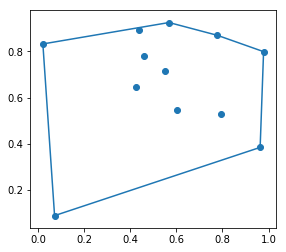

In [182]:
numpy.random.seed(0)
xy = numpy.random.rand(12, 2)
points = [Point(x,y) for x,y in xy]

poly = convex_hull(*points)
print len(poly.vertices)

xx = list([float(pt.x) for pt in poly.vertices])
yy = list([float(pt.y) for pt in poly.vertices])

matplotlib.pyplot.gca().set_aspect('equal')
matplotlib.pyplot.scatter([pt.x for pt in points], [pt.y for pt in points]);
matplotlib.pyplot.plot(xx + xx[0:1], yy + yy[0:1]);

## Графики

Библиотека `sympy` умеет рисовать графики, используя библиотеку `matplotlib`, немного оборачивая ее для автоматического выбора диапазона, адаптивного числа точек, перенесения осей в 0, а заодно и затрудняя использование возможностей `matplotlib`, для которых обертки нет. Манки-патч в функции `plot_plus` немного решает эту проблему для самых вопиющих вещей.

In [183]:
def plot_plus(plot_fn, *args, **kwargs):
    parse_args = {'set_aspect', 'figsize'}
    if set(kwargs.keys()) & parse_args:
        kw = {k:v for k,v in kwargs.items() if k not in parse_args}
        kw['show'] = False
        p = plot_fn(*args, **kw)
        p._backend = p.backend(p)
        if 'figsize' in kwargs:
            p._backend.fig.set_size_inches(kwargs['figsize'])
        if 'set_aspect' in kwargs:
            p._backend.ax.set_aspect(kwargs['set_aspect'])
        p._backend.show()
        return p
    else:
        return plot_fn(*args, **kwargs)

import functools
for fn in 'plot plot_parametric plot3d plot3d_parametric_line plot3d_parametric_surface plot_implicit'.split():
    globals()[fn] = functools.partial(plot_plus, getattr(sympy.plotting, fn))

In [184]:
x, y, t, u = var('x y t u')

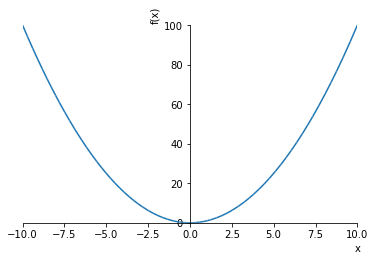

In [185]:
plot(x**2);

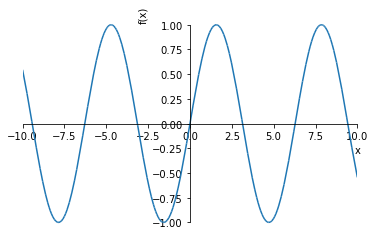

In [186]:
plot(sin(x));

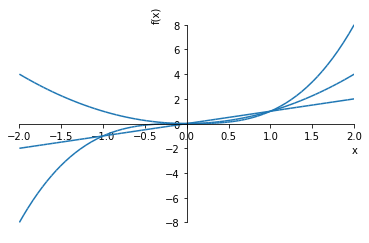

In [187]:
plot(x, x**2, x**3, (x, -2, 2));

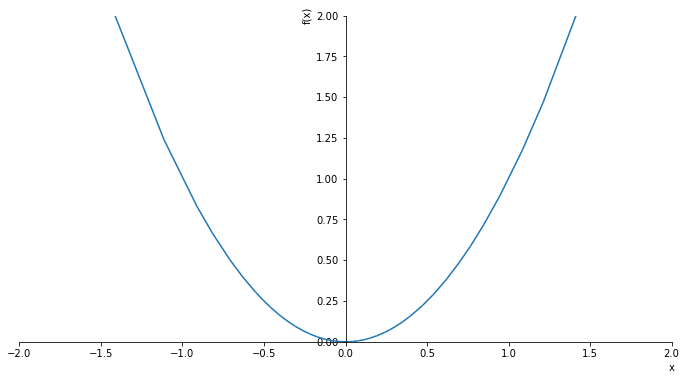

In [188]:
plot(x ** 2, xlim=(-2,2), ylim=(0,2), set_aspect='equal', figsize=(12,6));

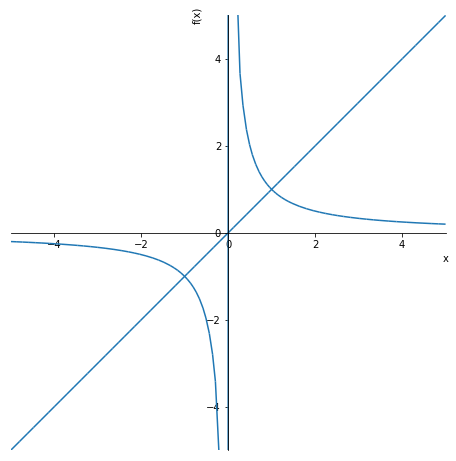

In [189]:
plot(1/x, x, (x, -5, 5), ylim=(-5, 5), set_aspect='equal', figsize=(8,8));

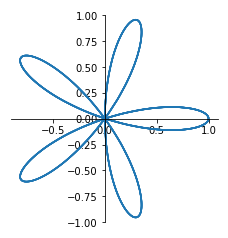

In [190]:
plot_parametric(cos(t * 5) * cos(t), cos(t * 5) * sin(t), set_aspect='equal');

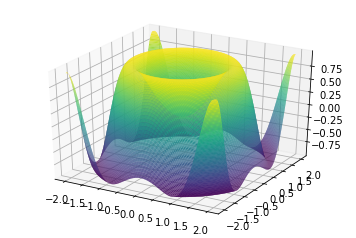

In [191]:
plot3d(sin(x**2 + y**2), (x, -2, 2), (y, -2, 2), nb_of_points_x=200, nb_of_points_y=200);

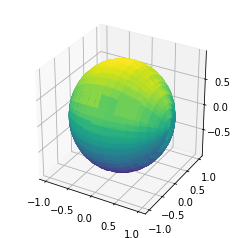

In [192]:
plot3d_parametric_surface(cos(t), sin(t) * sin(u), sin(t) * cos(u), set_aspect='equal');

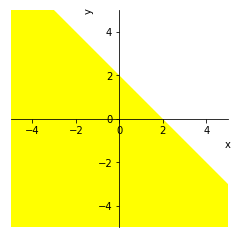

In [193]:
plot_implicit(x + y < 2, line_color='yellow', set_aspect='equal');

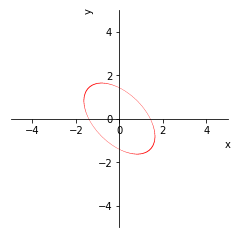

In [194]:
plot_implicit(x ** 2 + y ** 2 + x * y - 2, line_color='red', set_aspect='equal');

## Статистика

In [195]:
import sympy.stats
from sympy.stats import Normal, Die, P, E, variance, std, cdf, density, sample

In [196]:
p, t = symbols('p t', positive=True, real=True)
x = sympy.stats.Binomial('x', 5, p)
simplify(E(exp(t*x)))

 5  5⋅t      4           4⋅t       3        2  3⋅t       2        3  2⋅t      
p ⋅ℯ    + 5⋅p ⋅(-p + 1)⋅ℯ    + 10⋅p ⋅(p - 1) ⋅ℯ    - 10⋅p ⋅(p - 1) ⋅ℯ    + 5⋅p

        4  t          5
⋅(p - 1) ⋅ℯ  - (p - 1) 

In [197]:
Twodices = Die('X', 6) + Die('Y', 6)

In [198]:
throws = [int(sample(Twodices)) for i in range(1000)]

In [199]:
P(Eq(Twodices, 6))

5/36

In [200]:
twodices = density(Twodices)
twodices

{2: 1/36, 3: 1/18, 4: 1/12, 5: 1/9, 6: 5/36, 7: 1/6, 8: 5/36, 9: 1/9, 10: 1/12
, 11: 1/18, 12: 1/36}

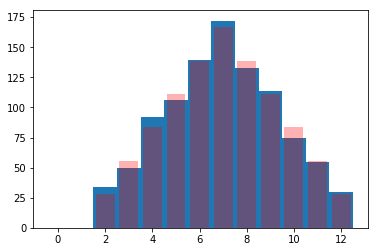

In [201]:
hist(throws, range=(0.5, 12.5), bins=12);
bar(range(13), [1000 * float(twodices.get(i, 0)) for i in range(13)], color='r', alpha=0.3);

In [202]:
iq = sympy.stats.Normal('iq', 100, 15)
print E(iq), std(iq), variance(iq)
print N(P(iq > 150))
display(density(iq)(x))
display(simplify(cdf(iq)(x)))
print [sample(iq) for i in range(10)]

100 15 225
0.000429060333196837


              2 
    -(x - 100)  
    ────────────
        450     
√2⋅ℯ            
────────────────
     30⋅√π      

   ⎛√2⋅(x - 100)⎞    
erf⎜────────────⎟    
   ⎝     30     ⎠   1
───────────────── + ─
        2           2

[100.684456640200, 105.223444284671, 95.7518849755922, 70.4066286794701, 94.4170395543877, 55.4158027715594, 102.657052714370, 116.717820255803, 102.557040346538, 101.089898912479]


In [203]:
float(E(iq, iq > 100))

111.96826841204297

In [204]:
P(iq > 150).rewrite(Integral)

     ⎛             ⎛5⋅√2⎞          ⎞
     ⎜  3⋅√2⋅√π⋅erf⎜────⎟          ⎟
     ⎜             ⎝ 3  ⎠   3⋅√2⋅√π⎟
5⋅√2⋅⎜- ───────────────── + ───────⎟
     ⎝          10             10  ⎠
────────────────────────────────────
                6⋅√π                

## Физика

In [205]:
from sympy.physics import units

In [206]:
print units.acceleration_due_to_gravity.convert_to(units.m / units.s ** 2)

9.80665*meter/second**2


In [207]:
print units.year.convert_to(units.second)

31556925.216*second


In [208]:
print units.convert_to(1 * units.pound * units.acceleration_due_to_gravity * 1 * units.foot, units.joule).n()

1.3558179483314*joule


Третий закон Кеплера

In [209]:
T = symbols("T")
a = units.Quantity('venus_a', units.length, 108208000e3 * units.meter)
M = units.Quantity('solar_mass', units.mass, 1.9891e30 * units.kilogram)

G = units.gravitational_constant
eq = Eq(T**2 / a**3, 4*sympy.pi**2 / G / M)
q = solve(eq, T)[1]
print q
print units.convert_to(q, units.day).n()

6.28318530717959*venus_a**(3/2)/(sqrt(gravitational_constant)*sqrt(solar_mass))
224.662800523082*day


## Интероп с Python

Выражение, результат символьного вычисления, можно сунуть в питон-функцию

In [210]:
def naive_sum_of_squares(n):
    result = 0
    for i in range(1, n + 1):
        result += i ** 2
    return result

In [211]:
%timeit naive_sum_of_squares(1000000)

1 loops, best of 3: 983 ms per loop


In [212]:
def fast_naive_sum_of_squares(n):
    return sum(arange(1, n + 1) ** 2)

In [213]:
%timeit fast_naive_sum_of_squares(1000000)

100 loops, best of 3: 4.08 ms per loop


In [214]:
k, n = var('k n')
sum_of_squares = lambdify(n, summation(k ** 2, (k, 1, n)))
print sum_of_squares(5)

55.0


In [215]:
%timeit sum_of_squares(1000000)

100000 loops, best of 3: 2.41 µs per loop


In [216]:
print lambdify(x, Si(x), modules='sympy')(5.0)

1.54993124494467


## Интероп с Maple

Иногда вызов внешней CAS удобнее или быстрее дает ответ

In [217]:
def eval_maple(expr):
    import os, delegator
    cmaple_dir = 'c:\\Program Files (x86)\\Maple 15\\bin.win'
    cmaple_exe = 'c:\\Program Files (x86)\\Maple 15\\bin.win\\cmaple.exe'
    cd = os.getcwdu()
    os.chdir(cmaple_dir)
    maple = delegator.run([cmaple_exe], block=False)
    maple.expect('>')
    maple.send('interface(prettyprint=0);')
    maple.expect('>')
    maple.send(expr)
    maple.expect('>')
    maple.send('quit();')
    os.chdir(cd)
    return '\r\n'.join(maple.out.splitlines()[3:-2])

In [218]:
integrate(sin(exp(x)), x)

⌠           
⎮    ⎛ x⎞   
⎮ sin⎝ℯ ⎠ dx
⌡           

In [219]:
S(eval_maple('int(sin(exp(x)), x);'))

  ⎛ x⎞
Si⎝ℯ ⎠

In [220]:
%%time
print sympy.factorint(987345823683476598732645172)

{2: 2, 173558250066979L: 1, 29: 1, 49041759323L: 1}
Wall time: 2.9 s


In [221]:
%%time
print eval_maple('ifactor(987345823683476598732645172);')

``(2)^2*``(29)*``(49041759323)*``(173558250066979)
Wall time: 126 ms


In [222]:
def parse_ifactor_output(s):
    result = {}
    import re
    s = re.sub('\s+', '', s)
    for item in s.split('*'):
        m = re.match('^``\((\d+)\)(?:\^(\d+))?$', item)
        if not m:
            raise Exception('ifactor says ' + s + ', item = ' + item)
        base = int(m.groups()[0])
        power = int(m.groups()[1]) if m.groups()[1] is not None else 1
        result[base] = power
    return result

def maple_factorint(n):
    output = eval_maple('ifactor(%d);' % n)
    return parse_ifactor_output(output)

In [223]:
%%time
print maple_factorint(987345823683476598732645172)

{2: 2, 173558250066979L: 1, 29: 1, 49041759323L: 1}
Wall time: 124 ms
